    * A paragraph that summarizes the quality of this data set and a request for additional data if needed
Dataset acquired from fivethirtyeight's GitHub repo: https://github.com/fivethirtyeight/data/tree/master/bob-ross

Sections required in your report:

    * Brief description of the data set and a summary of its attributes
    * Initial plan for data exploration
    * Actions taken for data cleaning and feature engineering
    * Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
    * Formulating at least 3 hypothesis about this data
    * Conducting a formal significance test for one of the hypotheses and discuss the results 
    * Suggestions for next steps in analyzing this data

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy

In [2]:
# 29	S03E04, title is "Winter Night" but doesn't have Night==1
data_filename = './data/elements-by-episode.csv'
initial_df = pd.read_csv(data_filename)
initial_df.head()


,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [3]:
initial_df.columns

Index(['EPISODE', 'TITLE', 'APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH',
       'BOAT', 'BRIDGE', 'BUILDING', 'BUSHES', 'CABIN', 'CACTUS',
       'CIRCLE_FRAME', 'CIRRUS', 'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS',
       'DECIDUOUS', 'DIANE_ANDRE', 'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM',
       'FENCE', 'FIRE', 'FLORIDA_FRAME', 'FLOWERS', 'FOG', 'FRAMED', 'GRASS',
       'GUEST', 'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'HILLS', 'LAKE',
       'LAKES', 'LIGHTHOUSE', 'MILL', 'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT',
       'OCEAN', 'OVAL_FRAME', 'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT',
       'RECTANGLE_3D_FRAME', 'RECTANGULAR_FRAME', 'RIVER', 'ROCKS',
       'SEASHELL_FRAME', 'SNOW', 'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS',
       'STRUCTURE', 'SUN', 'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME',
       'WATERFALL', 'WAVES', 'WINDMILL', 'WINDOW_FRAME', 'WINTER',
       'WOOD_FRAMED'],
      dtype='object')

In [5]:
# Change all column names to lowercase
# This will make it easier to group related features in the next section, so I don't have to
# repeatedly toggle caps lock
lowered_df = initial_df.copy()
lowered_df.columns = initial_df.columns.str.lower()
lowered_df

,episode,title,apple_frame,aurora_borealis,barn,beach,boat,bridge,building,bushes,...,tomb_frame,tree,trees,triple_frame,waterfall,waves,windmill,window_frame,winter,wood_framed
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,S31E09,"""EVERGREEN VALLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
399,S31E10,"""BALMY BEACH""",0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
400,S31E11,"""LAKE AT THE RIDGE""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
401,S31E12,"""IN THE MIDST OF WINTER""",0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [6]:
transposed_df = lowered_df.copy()
transposed_df = transposed_df.drop(labels=['episode', 'title'], axis=1)
transposed_df = transposed_df.transpose()
transposed_df['sum'] = transposed_df.agg(func=sum, axis=1)
sum_sorted = transposed_df['sum'].sort_values(ascending=False)
sum_sorted.head(30)

tree              361
trees             337
deciduous         227
conifer           212
clouds            179
mountain          160
lake              143
grass             142
river             126
bushes            120
snowy_mountain    109
mountains          99
cumulus            86
structure          85
rocks              77
snow               75
cabin              69
winter             69
framed             53
path               49
sun                40
waterfall          39
oval_frame         38
ocean              36
waves              34
cirrus             28
beach              27
fence              24
fog                23
guest              22
Name: sum, dtype: int64

<ipython-input-8-3b44515b96ad>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


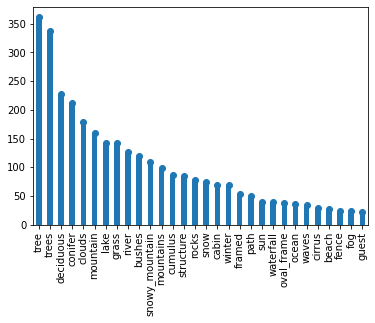

In [8]:
sum_sorted.head(30).plot.bar()
ax = plt.axes()
ax.scatter(transposed_df.index, sum_sorted)

Now that we know that Bob Ross loves painting trees the most, let's dial in and see if there is some type of correlation between trees and the weather patterns. I want the probability that the painting is in the winter based on the number of times a mountain or deciduous tree appears.

<AxesSubplot:title={'center':'Correlation of all ungrouped features'}>

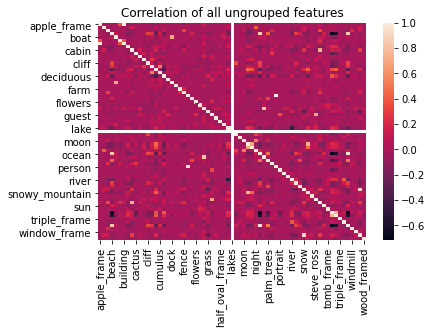

In [9]:
# Create correlation heatmap of all ungrouped features
corr = lowered_df.corr()
ax = plt.axes()
ax.set(title='Correlation of all ungrouped features')
sns.heatmap(corr)


In [10]:

# corr_high = corr.abs().lt(0.9).gt(0.6)
# Can add .to_frame() to make it display nicely
corr_high = corr.stack().reset_index().rename(
    columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'high_corr'}
)
corr_high = corr_high[corr_high['high_corr'].abs().between(left=0.5, right=0.99)]
corr_high = corr_high.sort_values(by='high_corr', ascending=False)
corr_high.iloc[::2, :]  # Remove duplicates, every other row was the same as the row above it except feature1/feature2 were swapped
corr_high[corr_high['high_corr'].abs().between(left=0.5, right=0.99)].reset_index()

,feature1,feature2,high_corr
2635,ocean,waves,0.969188
4065,waves,ocean,0.969188
3364,snow,winter,0.916661
4274,winter,snow,0.916661
237,beach,ocean,0.855598
2577,ocean,beach,0.855598
4029,waves,beach,0.847090
259,beach,waves,0.847090
2666,oval_frame,framed,0.829166
1756,framed,oval_frame,0.829166


In [224]:
# df_frames = lowered_df.filter(like='frame')  
# Group related features, such as trees, buildings, etc.
"""
Index(['episode', 'title', 'apple_frame', 'aurora_borealis', 'barn', 'beach',
       'boat', 'bridge', 'building', 'bushes', 'cabin', 'cactus',
       'circle_frame', 'cirrus', 'cliff', 'clouds', 'conifer', 'cumulus',
       'deciduous', 'diane_andre', 'dock', 'double_oval_frame', 'farm',
       'fence', 'fire', 'florida_frame', 'flowers', 'fog', 'framed', 'grass',
       'guest', 'half_circle_frame', 'half_oval_frame', 'hills', 'lake',
       'lakes', 'lighthouse', 'mill', 'moon', 'mountain', 'mountains', 'night',
       'ocean', 'oval_frame', 'palm_trees', 'path', 'person', 'portrait',
       'rectangle_3d_frame', 'rectangular_frame', 'river', 'rocks',
       'seashell_frame', 'snow', 'snowy_mountain', 'split_frame', 'steve_ross',
       'structure', 'sun', 'tomb_frame', 'tree', 'trees', 'triple_frame',
       'waterfall', 'waves', 'windmill', 'window_frame', 'winter',
       'wood_framed'
"""
# pt = initial_df.loc[initial_df['PALM_TREES'] == 1]
# display(pt[['TITLE', 'PALM_TREES']])
# display(df_trees)
group_tree = ['conifer', 'deciduous', 'palm_trees', 'tree', 'trees']
group_structure = ['barn', 'bridge', 'building', 'cabin', 'dock', 'farm', 'fence', 'lighthouse', 'mill', 'structure', 'windmill']
group_water = ['beach', 'lake', 'lakes', 'ocean', 'river', 'waterfall', 'waves']
group_frame = [col for col in lowered_df.columns if 'frame' in col]
group_cloud = ['cirrus', 'clouds', 'cumulus']
group_plant = ['bushes', 'cactus', 'flowers', 'grass']
group_mountain = ['cliff', 'mountain', 'mountains', 'hills', 'snowy_mountain']
group_guest = ['diane_andre', 'guest', 'steve_ross']
group_winter = ['winter', 'snow']
# group_weather = ['aurora_borealis', 'fog', 'winter', 'snow']
# group_other = ['boat', 'fire', 'moon', 'night', 'path', 'person', 'portrait', 'rocks', 'sun'] + group_weather

all_groups = group_tree + group_structure + group_water + group_frame + group_cloud + group_plant + group_mountain + group_guest + group_winter
# + group_weather + group_other
# Get all column names that contain frame 

In [219]:
summed_groups
# Count appearances of all groups
summed_groups_df = all_groups_df.copy()
summed_groups_df = summed_groups_df.transpose().drop(labels=['episode','title'])
summed_groups = summed_groups_df.sum(axis=1).astype(int).sort_values(ascending=False)

group_tree         369
group_water        303
group_plant        230
group_mountain     183
group_cloud        182
group_structure    102
rocks               77
snow                75
winter              69
group_frame         54
path                49
sun                 40
fog                 23
group_guest         22
night               11
portrait             3
moon                 3
boat                 2
aurora_borealis      2
person               1
fire                 1
dtype: int32

<AxesSubplot:title={'center':'Correlation of grouped features'}>

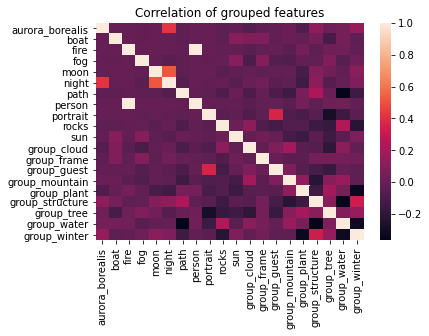

In [275]:
sns.heatmap(all_groups_corr, yticklabels=True)  # Show every y-axis label instead of every other label
# Create correlation heatmap for all groups
all_groups_df = lowered_df.copy()
groups = [
    ('group_tree', group_tree), ('group_structure', group_structure), 
    ('group_water', group_water), ('group_frame', group_frame), 
    ('group_cloud', group_cloud), ('group_plant', group_plant), 
    ('group_mountain', group_mountain), ('group_guest', group_guest),
    ('group_winter', group_winter)
    # ('group_weather', group_weather), 
]
for group_name, group_columns in sorted(groups):
    all_groups_df[group_name] = all_groups_df[group_columns].agg(func=max, axis=1)
    all_groups_df = all_groups_df.drop(labels=group_columns, axis=1)

all_groups_corr = all_groups_df.corr()
ax = plt.axes()
ax.set(title='Correlation of grouped features')


Hypothesis 1: If I choose a painting with a Mountain, it's statistically more likely to also have Snow

Hypothesis 2: If there's a Tree, the painting is more likley to be framed 

Hypothesis 3: If it's a Winter painting, Bob Ross will have also painted a Structure

In [228]:

mean_df = lowered_df.copy()
mean_df.set_index(keys='episode', inplace=True)
mean_df.drop(labels='title', inplace=True, axis=1)
average_occur_mean = mean_df.sum().mean()  # Average number of occurences for each feature == 48.07
average_occur_median = mean_df.sum().median()  # Median number of occurences for each feature == 11
# The Mean (48) is skewed beause Bob Ross loves to draw trees, so we're using the Median (11) number of occurrences instead
average_occur_mean, average_occur_median

In [229]:
average_occur_mean, average_occur_median
grouped_mean_df = all_groups_df.copy()
grouped_mean_df.set_index(keys='episode', inplace=True)
grouped_mean_df.drop(labels='title', inplace=True, axis=1)
average_occur_mean = grouped_mean_df.sum().mean()  # Average number of occurences for each feature == 87
average_occur_median = grouped_mean_df.sum().median()  # Median number of occurences for each feature == 45

(86.7, 44.5)

In [310]:
grouped_df['group_mountain'] = grouped_df[group_mountain].agg(func=max, axis=1)
# Hypothesis 1: If I choose a painting with a Mountain, it's statistically more likely to also have Snow
grouped_df = lowered_df.copy()
grouped_df = grouped_df.drop(labels=group_mountain, axis=1)

num_mountain = grouped_df['group_mountain'].sum()  # 183 paintings (45.41%) have a Mountain, above mean and median
num_snow = grouped_df['snow'].sum()  # 75 paintings (18.61%) have Snow, above mean and median (below grouped mean)
grouped_df['snow_with_mountains'] = grouped_df['group_mountain'] & grouped_df['snow']
num_snow_and_mountain = grouped_df['snow_with_mountains'].sum()  # 31 paintings have Snow and Mountains, below the mean (48) but above the median (11)

num_snow_and_mountain / num_mountain  # 16.94% of paintings with Mountains also have Snow
num_snow_and_mountain / num_snow      # 41.33% of Snow paintings also contain a Mountain


0.41333333333333333

In [309]:
# Hypothesis 2: If the painting is Framed, it's highly likely the painting will not contain a Tree 
grouped_df = lowered_df.copy()
grouped_df['group_tree'] = grouped_df[group_tree].agg(func=max, axis=1)
grouped_df['group_frame'] = grouped_df[group_frames].agg(func=max, axis=1)
grouped_df = grouped_df.drop(labels=group_tree+group_frames, axis=1)

num_all_paintings = len(grouped_df)
num_framed_paintings = grouped_df['group_frame'].sum()   # 54 Framed paintings
num_framed_paintings / num_all_paintings                 # 13.39% of paintings are Framed

grouped_df['tree_and_frame'] = grouped_df['group_tree'] & grouped_df['group_frame']
num_tree_and_frame = grouped_df['tree_and_frame'].sum()  # 51 Framed paintings with trees
num_tree_and_frame / num_all_paintings                   # 12.66% of paintings are Framed with Trees  
num_tree_and_frame / num_framed_paintings                # 94.44% of Framed paintings have Trees

0.9444444444444444

In [317]:
# Hypothesis 3: If it's a Winter painting, Bob Ross will have also painted a Structure
# Short and neat way to create the same winter_and_structure column as below
all_groups_df[all_groups_df['group_winter'] == 1].loc[   # Bob Ross has 77 Winter paintings (above the mean & median), 19.10% of all paintings
    all_groups_df['group_structure'] == 1].loc[          # of the 77 Winter paintings, 41 contain a Structure (above median) (53.24%)
        all_groups_df['group_guest'] == 0]               # 22 episodes with guests, 5.45% (22/403) of all episodes are guests

grouped_df = lowered_df.copy()
grouped_df['group_winter'] = grouped_df[group_winter].agg(func=max, axis=1)
grouped_df['group_structure'] = grouped_df[group_structure].agg(func=max, axis=1)
grouped_df['group_guest'] = grouped_df[group_guest].agg(func=max, axis=1)

grouped_df = grouped_df.drop(labels=group_winter+group_structure, axis=1)
num_all_paintings = len(grouped_df)
num_winter_paintings = grouped_df['group_winter'].sum()           # 77 Winter paintings
num_structure_paintings = grouped_df['group_structure'].sum()     # 102 paintings with a Structure

num_winter_paintings / num_all_paintings                          # 19.10% of all paintings are Winter-related
num_structure_paintings / num_all_paintings                       # 25.31% of all paintings have a structure

grouped_df['winter_and_structure'] = grouped_df['group_winter'] & grouped_df['group_structure']
# Make sure it's by Bob Ross, not a Guest
grouped_df['winter_and_structure'] = grouped_df['winter_and_structure'].loc[grouped_df['group_guest'] == 0]  
num_winter_and_structure = grouped_df['winter_and_structure'].sum()  # 41 Winter paintings by Bob Ross with a Structure
num_winter_and_structure / num_all_paintings                         # 10.42% of paintings are Winter with Structure
num_winter_and_structure / num_winter_paintings                      # 53.25% of Winter paintings have a Structure

0.5324675324675324

In [316]:
all_groups_corr
all_corr_high = all_groups_corr.stack().reset_index().rename(
    columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'high_corr'}
)
all_corr_high = all_corr_high[all_corr_high['high_corr'].abs().between(left=0.2, right=0.99)]
all_corr_high = all_corr_high.sort_values(by='high_corr', ascending=False)
all_corr_high
# all_corr_high.iloc[::2, :]  # Remove duplicates, every other row was the same as the row above it except feature1/feature2 were swapped


,feature1,feature2,high_corr
104,night,moon,0.516984
85,moon,night,0.516984
5,aurora_borealis,night,0.421589
100,night,aurora_borealis,0.421589
268,group_guest,portrait,0.360398
173,portrait,group_guest,0.360398
396,group_winter,group_structure,0.326788
339,group_structure,group_winter,0.326788
369,group_water,rocks,0.235362
198,rocks,group_water,0.235362


In [284]:
all_groups_df[all_groups_df['group_tree'] ==1])

0.9156327543424317